In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT', 'FB']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [4]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.62257046, 0.37742954])

In [6]:
#Expected portfolio return
np.sum(weights * log_returns.mean()) * 250


0.14921203730264837

In [8]:
#Expected Portfolio Variance
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))


0.037670709522100464

In [10]:
#Expected Portfolio Volatility 
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))


0.19408943691530578

In [20]:
#Empty lists

pf_returns = []
pf_volatilities = []

#loop with 1000 iterations

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities

([0.1832075453718017,
  0.1430473791177051,
  0.16226579053813814,
  0.16965678623471445,
  0.20118478638362494,
  0.19089349557463348,
  0.14815118314551032,
  0.15895384283590158,
  0.10292591323838503,
  0.14782139911524414,
  0.12475138512861043,
  0.13567444524090488,
  0.11182510577454398,
  0.14897950534298213,
  0.17826176417272377,
  0.17146812999098893,
  0.15836836732738852,
  0.11562838584749444,
  0.16270681135282436,
  0.15938982929476747,
  0.15685497582442134,
  0.13990803360001508,
  0.15776936408924264,
  0.11343760270481311,
  0.16639697029587383,
  0.1297966880829322,
  0.1752642998646176,
  0.18939280942615108,
  0.16419572876166397,
  0.20869585924860828,
  0.16561554773772558,
  0.1651254708621891,
  0.18696683160249233,
  0.19502987920463835,
  0.15539395382579446,
  0.18343241843582017,
  0.21177405263217075,
  0.10799188305810617,
  0.17642779931567995,
  0.18283508133129153,
  0.1654506111618903,
  0.1756173556209578,
  0.14046112301901761,
  0.14259691120243

In [22]:
#transform to numpy
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([0.18320755, 0.14304738, 0.16226579, 0.16965679, 0.20118479,
        0.1908935 , 0.14815118, 0.15895384, 0.10292591, 0.1478214 ,
        0.12475139, 0.13567445, 0.11182511, 0.14897951, 0.17826176,
        0.17146813, 0.15836837, 0.11562839, 0.16270681, 0.15938983,
        0.15685498, 0.13990803, 0.15776936, 0.1134376 , 0.16639697,
        0.12979669, 0.1752643 , 0.18939281, 0.16419573, 0.20869586,
        0.16561555, 0.16512547, 0.18696683, 0.19502988, 0.15539395,
        0.18343242, 0.21177405, 0.10799188, 0.1764278 , 0.18283508,
        0.16545061, 0.17561736, 0.14046112, 0.14259691, 0.16775895,
        0.13089731, 0.13037313, 0.1720593 , 0.14068855, 0.17088951,
        0.12444746, 0.12418053, 0.17890948, 0.15487006, 0.14274014,
        0.15968192, 0.16432739, 0.14061013, 0.15012789, 0.21108618,
        0.15000247, 0.14626541, 0.16249222, 0.12892348, 0.15479068,
        0.1578535 , 0.13357033, 0.17655577, 0.12544638, 0.14327425,
        0.19343372, 0.17316351, 0.12077349, 0.16

In [24]:
#for graph
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})
portfolios.head()


,Return,Volatility
0,0.183208,0.235456
1,0.143047,0.190528
2,0.162266,0.206030
3,0.169657,0.215137
4,0.201185,0.268005


Text(0, 0.5, 'Expected Return')

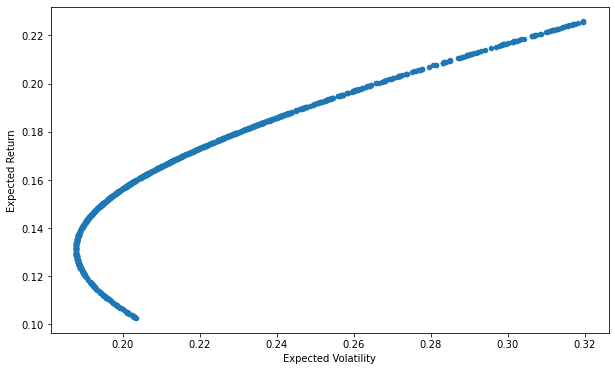

In [25]:
# x axis - volatility data
# y axis - rates of return 
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')